<a href="https://colab.research.google.com/github/FabianoNegreiros/aluraFN/blob/main/IASoccer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
%pip install google-genai

In [45]:
import google.generativeai as genai
import os
from google.colab import userdata
import textwrap
import pandas as pd  # Para criar o DataFrame do relatório
import matplotlib.pyplot as plt  # Para gerar o gráfico

In [46]:
# Configura a API Key do Google Gemini
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])


In [47]:
def calcular_imc(peso, altura):
    """
    Calcula o Índice de Massa Corporal (IMC).
    """
    imc = peso / (altura ** 2)
    return imc


def interpretar_imc(imc):
    """
    Interpreta o IMC com base nos valores da OMS.
    """
    if imc < 18.5:
        return "Abaixo do peso"
    elif 18.5 <= imc <= 24.9:
        return "Peso normal"
    elif 25 <= imc <= 29.9:
        return "Sobrepeso"
    elif 30 <= imc <= 34.9:
        return "Obesidade grau 1"
    elif 35 <= imc <= 39.9:
        return "Obesidade grau 2"
    else:
        return "Obesidade grau 3"


def formatar_texto(texto):
    """
    Formata o texto para melhor exibição.
    """
    return textwrap.indent(texto, '> ', predicate=lambda _: True)


In [50]:
def coletar_dados_atleta():
    """
    Coleta os dados do atleta por meio de perguntas interativas.
    Valida as entradas do usuário para garantir que sejam válidas.
    """
    while True:
        try:
            idade = int(input("Idade do atleta: "))
            break
        except ValueError:
            print("Por favor, digite um número inteiro para a idade.")

    while True:
        posicao = input("""Posição de atuação:
Goleiro, Zagueiro, Lateral Esquerdo, Lateral Direito, Volante, Meia Ofensivo,
Segundo Atacante, Ponta Direita, Ponta Esquerda, Centroavante: """).lower()
        posicoes_validas = ["goleiro", "zagueiro", "lateral esquerdo", "lateral direito",
                           "volante", "meia ofensivo", "segundo atacante", "ponta direita",
                           "ponta esquerda", "centroavante", "gol", "zag", "le", "ld",
                           "vol", "mo", "sa", "pd", "pe", "ca"]
        if posicao in posicoes_validas:
            break
        print("Por favor, digite uma posição válida.")

    while True:
        try:
            peso = float(input("Peso do atleta (kg): ").replace(",", "."))
            break
        except ValueError:
            print("Por favor, digite um número válido para o peso.")

    while True:
        try:
            altura = float(input("Altura do atleta (m): ").replace(",", "."))
            break
        except ValueError:
            print("Por favor, digite um número válido para a altura.")

    posicao_completa = {
        "gol": "Goleiro",
        "zag": "Zagueiro",
        "le": "Lateral Esquerdo",
        "ld": "Lateral Direito",
        "vol": "Volante",
        "mo": "Meia Ofensivo",
        "sa": "Segundo Atacante",
        "pd": "Ponta Direita",
        "pe": "Ponta Esquerda",
        "ca": "Centroavante",
        "goleiro": "Goleiro",
        "zagueiro": "Zagueiro",
        "lateral esquerdo": "Lateral Esquerdo",
        "lateral direito": "Lateral Direito",
        "volante": "Volante",
        "meia ofensivo": "Meia Ofensivo",
        "segundo atacante": "Segundo Atacante",
        "ponta direita": "Ponta Direita",
        "ponta esquerda": "Ponta Esquerda",
        "centroavante": "Centroavante"
    }
    posicao = posicao_completa[posicao]

    dados = {
        "idade": idade,
        "posicao": posicao,
        "peso": peso,
        "altura": altura,
    }
    return dados



In [51]:
def criar_agente_treinamento():
    """
    Cria o agente de IA para gerar o plano de treinamento.
    """
    agente = genai.GenerativeModel(model_name="gemini-2.0-flash")

    instrucoes = """
        Você é um preparador físico especializado em futebol de alto rendimento.
        Com base nos dados fornecidos sobre o atleta, você deve gerar um plano de
        treinamento personalizado, fornecer orientações sobre peso e idade,
        e criar uma periodização do treinamento para aprimorar todas as capacidades
        físicas do atleta: força, resistência, flexibilidade, agilidade, coordenação,
        equilíbrio, velocidade, potência, precisão e tempo de reação.

        Considere os seguintes aspectos ao gerar o plano de treinamento:
        - Dados do atleta: idade, posição, peso, altura.
        - IMC: classifique o IMC do atleta e forneça orientações sobre o peso ideal
          para a prática de futebol de alto rendimento.
        - Idade: avalie se o atleta está em uma idade adequada para o alto rendimento
          e forneça considerações sobre o desenvolvimento físico.
        - Posição: leve em conta as demandas físicas da posição do atleta ao
          recomendar exercícios e atividades.

        O plano de treinamento deve incluir:
        - Objetivos: metas específicas e mensuráveis para o treinamento de todas as
          capacidades físicas.
        - Exercícios: descrição detalhada dos exercícios para cada capacidade física,
          séries, repetições, descanso e frequência.
        - Progressão: como o treinamento deve evoluir ao longo do tempo para cada
          capacidade física.
        - Recomendações: orientações adicionais sobre alimentação, descanso,
          prevenção de lesões, etc.

        A periodização do treinamento deve ser dividida em:
        - Período Preparatório: foco em preparação física geral e prevenção de lesões,
          com ênfase no desenvolvimento de força e resistência.
        - Período Competitivo: foco em manutenção e otimização do desempenho, com
          ênfase em velocidade, agilidade e potência.
        - Período de Transição: foco em recuperação e descanso ativo, com ênfase
          em flexibilidade e equilíbrio.

        Gere também um relatório de projeção do desenvolvimento do atleta ao
        longo do tempo, considerando os dados fornecidos e o plano de treinamento.
        Inclua uma estimativa de melhora em todas as capacidades físicas
        (força, resistência, flexibilidade, agilidade, coordenação, equilíbrio,
        velocidade, potência, precisão e tempo de reação) e no desempenho geral.
        """

    agente = genai.GenerativeModel(model_name="gemini-2.0-flash")
    return agente, instrucoes # Retorna o agente e as instruções

In [52]:
def gerar_plano_treinamento(agente, dados_atleta, instrucoes):
    """
    Gera o plano de treinamento usando o agente de IA.
    """

    mensagem = f"""
        Dados do Atleta:
        - Idade: {dados_atleta["idade"]} anos
        - Posição: {dados_atleta["posicao"]}
        - Peso: {dados_atleta["peso"]} kg
        - Altura: {dados_atleta["altura"]} m
        - IMC: {calcular_imc(dados_atleta["peso"], dados_atleta["altura"]):.2f} ({interpretar_imc(calcular_imc(dados_atleta["peso"], dados_atleta["altura"]))})
        """

    resposta = agente.generate_content(contents=[instrucoes, mensagem])
    return resposta.text

Idade do atleta: 42
Posição de atuação:
Goleiro, Zagueiro, Lateral Esquerdo, Lateral Direito, Volante, Meia Ofensivo,
Segundo Atacante, Ponta Direita, Ponta Esquerda, Centroavante: lateral esquerdo
Peso do atleta (kg): 79
Altura do atleta (m): 1.90

--- Plano de Treinamento Personalizado ---
> ## Plano de Treinamento Personalizado para Futebol de Alto Rendimento
> 
> Considerando a idade do atleta (42 anos) e sua posição de Lateral Esquerdo, este plano de treinamento será focado em otimizar o desempenho, prevenir lesões e manter a competitividade, ao invés de buscar ganhos explosivos como em atletas mais jovens. O foco será na manutenção da força, resistência e velocidade, com ênfase na inteligência tática e experiência.
> 
> **Dados do Atleta:**
> 
> *   Idade: 42 anos
> *   Posição: Lateral Esquerdo
> *   Peso: 79.0 kg
> *   Altura: 1.9 m
> *   IMC: 21.88 (Peso normal)
> 
> **Análise:**
> 
> *   **IMC:** O IMC do atleta está dentro da faixa normal, o que é positivo. O objetivo é mant

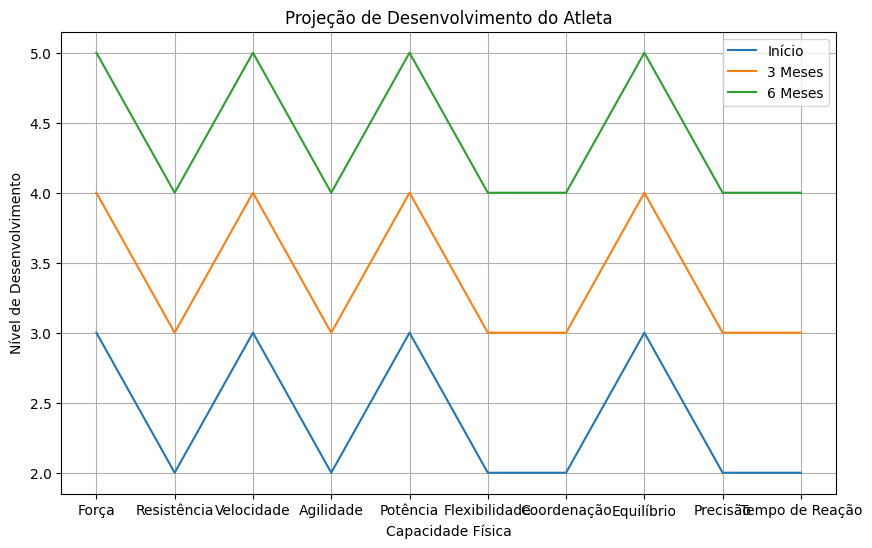

In [53]:
def apresentar_resultados(plano_treinamento, dados_atleta):
    """
    Apresenta o plano de treinamento, orientações, relatório e gráfico.
    """

    print("\n--- Plano de Treinamento Personalizado ---")
    print(formatar_texto(plano_treinamento))

    # Criação do DataFrame para o relatório de projeção (exemplo)
    relatorio = {
        "Capacidade": ["Força", "Resistência", "Velocidade", "Agilidade", "Potência", "Flexibilidade", "Coordenação", "Equilíbrio", "Precisão", "Tempo de Reação"],
        "Início": [3, 2, 3, 2, 3, 2, 2, 3, 2, 2],  # Valores iniciais (exemplo)
        "Projeção 3 meses": [4, 3, 4, 3, 4, 3, 3, 4, 3, 3],  # Projeção após 3 meses (exemplo)
        "Projeção 6 meses": [5, 4, 5, 4, 5, 4, 4, 5, 4, 4]  # Projeção após 6 meses (exemplo)
    }
    df_relatorio = pd.DataFrame(relatorio)

    print("\n--- Relatório de Projeção de Desenvolvimento do Atleta ---")
    print(df_relatorio)

    # Criação do gráfico de projeção (exemplo)
    plt.figure(figsize=(10, 6))  # Aumenta o tamanho da figura para melhor visualização
    plt.plot(df_relatorio["Capacidade"], df_relatorio["Início"], label="Início")
    plt.plot(df_relatorio["Capacidade"], df_relatorio["Projeção 3 meses"], label="3 Meses")
    plt.plot(df_relatorio["Capacidade"], df_relatorio["Projeção 6 meses"], label="6 Meses")
    plt.xlabel("Capacidade Física")
    plt.ylabel("Nível de Desenvolvimento")
    plt.title("Projeção de Desenvolvimento do Atleta")
    plt.legend()
    plt.grid(True)
    plt.show()


# Função principal para executar o programa
def main():
    """
    Função principal que coordena a execução do programa.
    """
    dados = coletar_dados_atleta()
    agente, instrucoes = criar_agente_treinamento()  # Recebe agente e instrucoes
    plano = gerar_plano_treinamento(agente, dados, instrucoes)  # Passa instrucoes para gerar_plano_treinamento
    apresentar_resultados(plano, dados)


if __name__ == "__main__":
    main()

